In [105]:
import matplotlib.pyplot as plt
import keras
import random
import pandas as pd
import numpy as np
import sklearn.preprocessing
from math import *
import cv2 as cv
import tensorflow_datasets as tfds

In [106]:
def show_rgbimg(image):
    plt.figure(figsize=(12, 10), dpi=80)
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.show()

In [107]:
#function to finc DCT(discrete cosine transform) of an image
def convert_img_to_dct(image):
    imagefloat=image.astype("float")
    dct_img=cv.dct(imagefloat)
    return dct_img

#function to convert Img from DCT
def convert_dct_to_img(dct_img):
    image=cv.idct(dct_img)
    return image
    

In [108]:
#function to convert to ycbcr
def conv_ycbcr(image):
    ycbcr_img=cv.cvtColor(image, cv2.COLOR_BGR2YCR_CB)
    return ycbcr_img[:,:,0],ycbcr_img[:,:,1],ycbcr_img[:,:,2] 


In [109]:
original_img=cv.imread('sage.png')
grayscale_img=cv.cvtColor(original_img,cv.COLOR_BGR2GRAY)
dct_img=convert_img_to_dct(grayscale_img)
print(dct_img)

[[ 2.18408956e+05 -2.01750940e+03  2.22183743e+04 ...  6.81754427e-01
   4.24658847e+00 -9.31367992e+00]
 [ 3.97792661e+03  3.93318265e+03 -4.22295535e+03 ... -7.89938878e+00
   5.59910351e+00  6.33910251e+00]
 [-9.30034817e+03  1.46169339e+03  2.16439216e+03 ... -5.92881884e+00
   5.90123227e+00  1.03445561e+01]
 ...
 [-1.32272950e+01 -1.99184990e+01 -3.69565101e+01 ... -4.05309974e+00
   5.29762464e+00  2.68142544e+00]
 [-2.08483235e+00  9.95467336e+00  5.02740077e+00 ...  6.71451991e+00
   3.27470307e+00 -9.56595513e+00]
 [ 2.62109347e+01 -5.67868446e+00  3.22568168e+01 ... -2.14604524e-01
  -5.53770821e+00  5.70514603e+00]]


In [110]:
idct_img=convert_dct_to_img(dct_img)
print(sum(sum(idct_img-grayscale_img)))
print(dct_img.shape)

-3.266589310157997e-08
(1080, 1920)


In [112]:
def patch_extraction(image,w,h,stride):
    patch_set=np.array([])
    width=image.shape[1]
    height=image.shape[0]
    channels=image.shape[2]
    #grayscale_img=cv.cvtColor(image,cv.COLOR_BGR2GRAY)
    for i in range(0,width,stride):
        for j in range(0,height,stride):
            #patch_set=patch_set.append(image[j:j+h+1,i:i+w+1,:])
            yield(image[j:j+h+1,i:i+w+1,:])



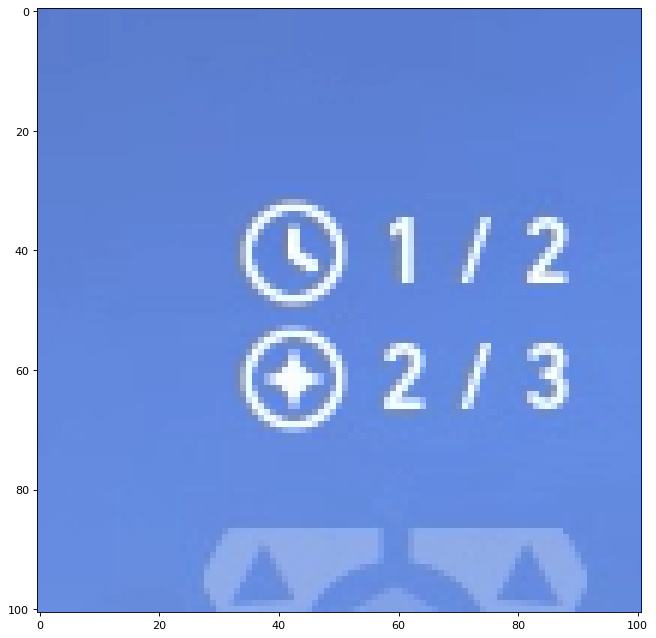

<class 'numpy.ndarray'>


In [116]:
patch_set=patch_extraction(original_img,100,100,50)
A=next(patch_set)
show_rgbimg(A)
print(type(A))

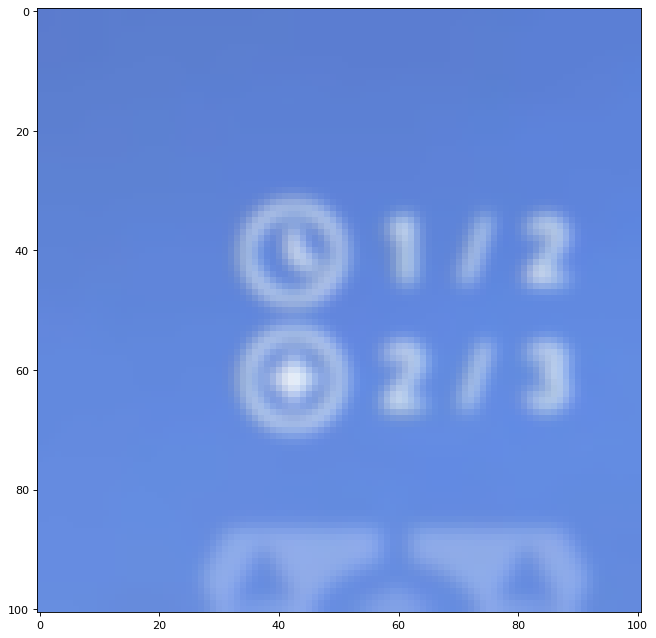

In [117]:
gblur_img=cv.GaussianBlur(A,(7,7),0)
show_rgbimg(gblur_img)


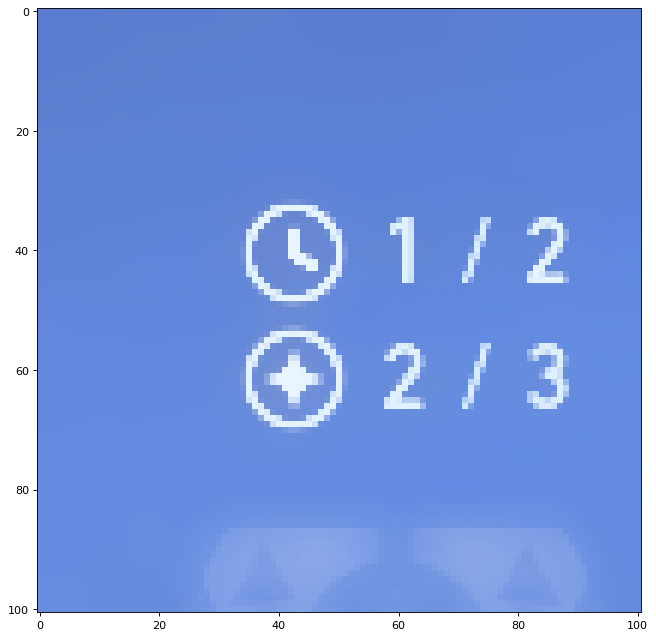

In [118]:
bilateral_img=cv.bilateralFilter(A,15,75,75)
show_rgbimg(bilateral_img)

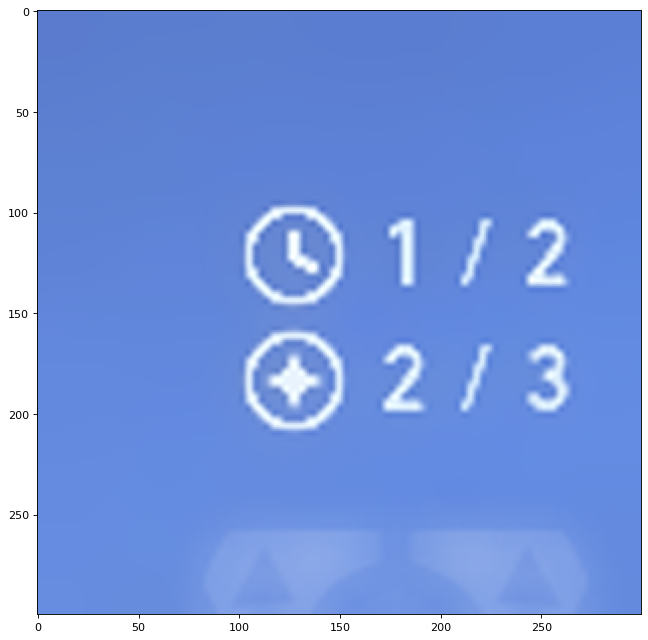

In [121]:
resized_img=cv.resize(bilateral_img,(300,300), interpolation=cv.INTER_CUBIC)
show_rgbimg(resized_img)

In [122]:
def preprocessing(image,scale):
    width=image.shape[1]
    height=image.shape[0]
    bilateral_img=cv.bilateralFilter(image,15,75,75)
    resized_img=cv.resize(bilateral,(width*scale,height*scale), interpolation=cv.INTER_CUBIC)
    return resized_img